In [ ]:
# Import Dependencies
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random
random.seed(246)  
import time
import datetime
import collections
import pandas as pd

print('Imports sucessful')

Imports sucessful


In [ ]:
# Allow access to the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filepath_random="/content/drive/My Drive/Colab Notebooks/NS_proj2_output_files/Final outputs/random.txt" 
filepath_regular="/content/drive/My Drive/Colab Notebooks/NS_proj2_output_files/Final outputs/regular.txt"
filepath_BAs="/content/drive/My Drive/Colab Notebooks/NS_proj2_output_files/Final outputs/BA_both.txt" 

In [ ]:
def read_file(filepath):
  data = pd.read_csv (filepath)
  data.to_csv (filepath, index=None)
  return data
#data.columns = ['first_column','second_column',...]

##READ AND CREATE ALL THE DATA SETS FOR EACH TOPOLOGY

In [ ]:
regular = read_file(filepath_regular)
random = read_file(filepath_random)
BAs = read_file(filepath_BAs)
ba_mod = BAs[BAs.Topology ==" BA__MOD"]
ba_rand = BAs[BAs.Topology ==" BA_RAND"]

In [ ]:
data = pd.concat(objs = [regular, random, BAs])

In [ ]:
data.head()

In [ ]:
data.describe()

In [ ]:
data[["Topology","T", "qt_coop"]].groupby(["Topology","T"]).describe()

#Models evaluation


<Figure size 432x288 with 0 Axes>

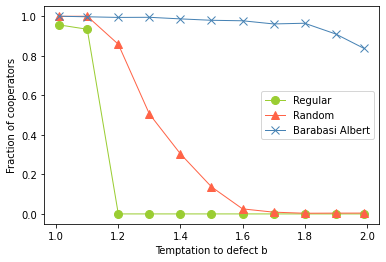

In [ ]:
#MEANS

fig = plt.figure()
fig, ax = plt.subplots()


y_mean_reg=regular[["T", "qt_coop"]].groupby("T").mean()
y_mean_ba_rand=ba_rand[["T", "qt_coop"]].groupby("T").mean()
y_mean_ran=random[["T", "qt_coop"]].groupby("T").mean()


plt.plot(y_mean_reg, color='yellowgreen', marker='o', linestyle='solid', linewidth=1, markersize=8, label = 'Regular')
plt.plot(y_mean_ran, color='tomato', marker='^', linestyle='solid', linewidth=1, markersize=8, label = 'Random')
plt.plot(y_mean_ba_rand, color='steelblue', marker='x', linestyle='solid', linewidth=1, markersize=8, label = 'Barabasi Albert')

plt.legend(loc = 'best')

#plt.title('Fraction of cooperators for different topologies and values of "b"\n')
plt.xlabel("Temptation to defect b")
plt.ylabel("Fraction of cooperators")


save_results_to = '/content/drive/My Drive/Colab Notebooks/NS_proj2_output_files/Final outputs/'
plt.savefig(save_results_to + 'all_models.png', dpi = 300)

plt.show()

##How the initial condition affects the fraction of cooperators in SFN

<Figure size 432x288 with 0 Axes>

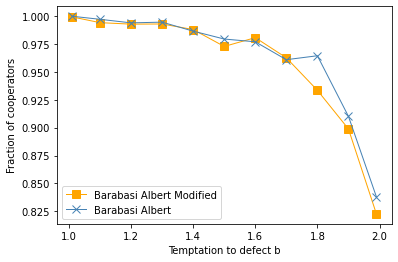

In [ ]:
#MEANS
fig = plt.figure()
fig, ax = plt.subplots()

y_mean_ba_mod=ba_mod[["T", "qt_coop"]].groupby("T").mean()
y_mean_ba_rand=ba_rand[["T", "qt_coop"]].groupby("T").mean()

plt.plot(y_mean_ba_mod, color='orange', marker='s', linestyle='solid', linewidth=1, markersize=8, label = 'Barabasi Albert Modified')
plt.plot(y_mean_ba_rand, color='steelblue', marker='x', linestyle='solid', linewidth=1, markersize=8, label = 'Barabasi Albert')

plt.legend(loc = 'best')

#plt.title('Fraction of cooperators of SFN with different starting conditions for different values of "b"\n')
plt.xlabel("Temptation to defect b")
plt.ylabel("Fraction of cooperators")


save_results_to = '/content/drive/My Drive/Colab Notebooks/NS_proj2_output_files/Final outputs/'
plt.savefig(save_results_to + 'BA-models.png', dpi = 300)

plt.show()